<img src = "https://images2.imgbox.com/a5/72/7ZbDUHlf_o.jpg" width="200">

### Perguntas:
---
- Quantos gêneros o filme "The Matrix" tem? Quais são os gêneros?
- Quantos gêneros cada filme tem, em média?
- Quais são os cinco filmes com maior número de gêneros?
- Quantos usuários deram nota para o filme "The Matrix"?
- Quantos usuários, em média, deram nota para cada filme?
- Quais são os cinco filmes para os quais mais usuários deram nota?
- Qual o rating médio do filme "The Matrix"?
- Cada filme tem um rating médio. Qual a média desses ratings, por gênero?
- Para cada gênero de filme, quantos usuários deram cada nota possível?

### Dicas:
---
1. Só é necessário as tabelas movies e ratings para este projeto.
2. Pesquise a função "explode" no pandas. Ela pode ser útil.

---

In [1]:
# Importando bibliotecas
import pandas as pd
import seaborn as sns

# configurando valor máximo de observações para 200
pd.set_option('display.max_rows', 200)

In [2]:
# Carregando dados 
movies_df = pd.read_csv('data/movies.csv')
ratings   = pd.read_csv('data/ratings.csv')

In [3]:
# primeiras observações do dataframe
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [5]:
# primeiras observações do dataframe
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [7]:
# Combinando os dataframes
movies_ratings_df = pd.merge(ratings, movies_df, on='movieId', how='left')

In [8]:
movies_ratings_df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [9]:
movies_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
 4   title      100836 non-null  object 
 5   genres     100836 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 5.4+ MB


---
## Quantos gêneros o filme "The Matrix" tem? Quais são os gêneros?

In [10]:
movies_df[movies_df.title.str.contains('Matrix', regex=True)]

,movieId,title,genres
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller
4351,6365,"Matrix Reloaded, The (2003)",Action|Adventure|Sci-Fi|Thriller|IMAX
4639,6934,"Matrix Revolutions, The (2003)",Action|Adventure|Sci-Fi|Thriller|IMAX


---
## Quantos gêneros cada filme tem, em média?

In [11]:
genres = movies_df.genres.str.split('|')
qtd_genres = genres.str.len().sum() / len(movies_df.movieId.unique())

print('Quantidade média de gêneros por filme:', round(qtd_genres, 2))

Quantidade média de gêneros por filme: 2.27


---
## Quais são os cinco filmes com maior número de gêneros?

In [12]:
count_genres = genres.str.len().sort_values(ascending=False).head(5).index.tolist()

print('Códigos dos 5 filmes com maior número de gêneros:', count_genres) 

Códigos dos 5 filmes com maior número de gêneros: [7441, 5556, 6626, 2250, 5819]


In [13]:
name_movies = movies_df.title.loc[movies_df.index.isin(count_genres)]

print('5 filmes com maior número de gêneros:', name_movies.to_list()) 

5 filmes com maior número de gêneros: ['Who Framed Roger Rabbit? (1988)', 'Patlabor: The Movie (Kidô keisatsu patorebâ: The Movie) (1989)', 'Robots (2005)', 'Enchanted (2007)', 'Rubber (2010)']


![](https://thumbs.gfycat.com/UnitedElegantKoalabear-size_restricted.gif)

---
## Quantos usuários deram nota para o filme "The Matrix"?

In [14]:
sum_users = sum(ratings.movieId == 2571)

print('Quantidade de usuários que deram nota para o filme The Matrix:', sum_users)

Quantidade de usuários que deram nota para o filme The Matrix: 278


---
## Quantos usuários, em média, deram nota para cada filme?

In [15]:
qtd_users = ratings.groupby('movieId')['userId'].count().mean()

print('Quantidade de usuários, em média, que deram nota para cada filme:', round(qtd_users, 2))

Quantidade de usuários, em média, que deram nota para cada filme: 10.37


---
## Quais são os cinco filmes para os quais mais usuários deram nota?

In [16]:
cod_movies = ratings.groupby('movieId')['movieId'].count().sort_values(ascending=False).head(5).index.tolist()

print('Código dos 5 filmes para os quais mais usuários deram nota:', cod_movies)

Código dos 5 filmes para os quais mais usuários deram nota: [356, 318, 296, 593, 2571]


In [17]:
qtd_movies = movies_df.loc[movies_df.movieId.isin(cod_movies)]

print('5  filmes para os quais mais usuários deram nota:', qtd_movies.title.to_list())

5  filmes para os quais mais usuários deram nota: ['Pulp Fiction (1994)', 'Shawshank Redemption, The (1994)', 'Forrest Gump (1994)', 'Silence of the Lambs, The (1991)', 'Matrix, The (1999)']


---
## Qual o rating médio do filme "The Matrix"?

In [18]:
rating_matrix = ratings.loc[(ratings.movieId == 2571), 'rating'].mean()

print('Rating médio do filme The Matrix (1999):', round(rating_matrix, 2))

Rating médio do filme The Matrix (1999): 4.19


---
## Cada filme tem um rating médio. Qual a média desses ratings, por gênero?

In [19]:
movies_ratings_df['genres'] = movies_ratings_df.genres.str.split('|')
movies_ratings_df = movies_ratings_df.explode('genres')

(movies_ratings_df.groupby('genres')['rating'].mean().round(2)).to_frame()

,rating
genres,
(no genres listed),3.49
Action,3.45
Adventure,3.51
Animation,3.63
Children,3.41
Comedy,3.38
Crime,3.66
Documentary,3.80
Drama,3.66


---
## Para cada gênero de filme, quantos usuários deram cada nota possível?

In [20]:
df = movies_ratings_df.groupby(['genres', 'rating'])['userId'].count().to_frame('qtd_users')
df

qtd_users
genres             rating           
(no genres listed) 0.5             2
                   1.0             2
                   2.0             2
                   2.5             6
                   3.0             6
                   3.5             6
                   4.0             8
                   4.5             8
                   5.0             7
Action             0.5           449
                   1.0           904
                   1.5           577
                   2.0          2548
                   2.5          1777
                   3.0          6331
                   3.5          4153
                   4.0          7678
                   4.5          2468
                   5.0          3750
Adventure          0.5           306
                   1.0           627
                   1.5           415
                   2.0          1769
                   2.5          1352
                   3.0          4838
                   3.5          3285
                   4.0          6392
                   4.5          2027
                   5.0          3150
Animation          0.5            80
                   1.0           116
                   1.5            96
                   2.0           346
                   2.5           365
                   3.0          1279
                   3.5          1051
                   4.0          1988
                   4.5           682
                   5.0           985
Children           0.5           169
                   1.0           301
                   1.5           161
                   2.0           721
                   2.5           530
                   3.0          2054
                   3.5          1205
                   4.0          2358
                   4.5           648
                   5.0          1061
Comedy             0.5           632
                   1.0          1317
                   1.5           895
                   2.0          3405
                   2.5          2530
                   3.0          8306
                   3.5          5086
                   4.0          9659
                   4.5          2794
                   5.0          4429
Crime              0.5           152
                   1.0           321
                   1.5           204
                   2.0           982
                   2.5           772
                   3.0          3116
                   3.5          2057
                   4.0          4621
                   4.5          1769
                   5.0          2687
Documentary        0.5             6
                   1.0            16
                   1.5             2
                   2.0            33
                   2.5            42
                   3.0           163
                   3.5           228
                   4.0           415
                   4.5           161
                   5.0           153
Drama              0.5           405
                   1.0           795
                   1.5           485
                   2.0          2339
                   2.5          1922
                   3.0          7541
                   3.5          5514
                   4.0         12360
                   4.5          4217
                   5.0          6350
Fantasy            0.5           178
                   1.0           286
                   1.5           214
                   2.0           893
                   2.5           719
                   3.0          2364
                   3.5          1634
                   4.0          2988
                   4.5          1040
                   5.0          1518
Film-Noir          0.5             8
                   1.0             6
                   1.5             4
                   2.0            33
                   2.5            17
                   3.0           106
                   3.5           108
                   4.0         

In [21]:
df = movies_ratings_df.groupby(['genres', 'rating'])['userId'].count().to_frame('qtd_users').reset_index()
df = df[df.genres != '(no genres listed)']

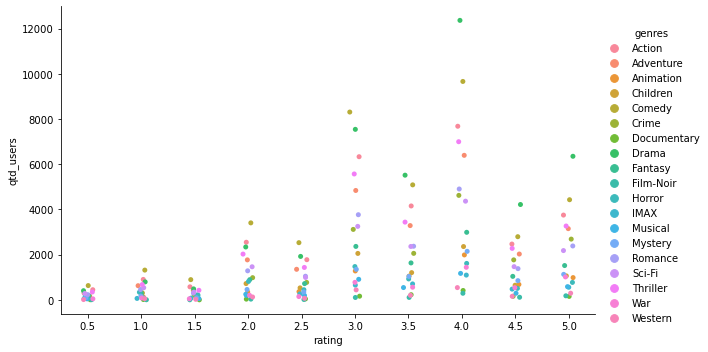

In [22]:
sns.catplot(x="rating", y="qtd_users", hue="genres", data=df, aspect=12/7);



![](https://media3.giphy.com/media/xUPOqo6E1XvWXwlCyQ/giphy.gif)

---